In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import f1_score

In [26]:
X =  pd.read_csv("X_train_f.csv",index_col="tripid")
y =  pd.read_csv("y_train.csv",index_col="tripid")["label"]
test =  pd.read_csv("X_test_f.csv",index_col="tripid")
X.head()

,duration,meter_waiting,meter_waiting_fare,fare,distance,additional_fare,pickup_time,drop_time,avg_speed,fare_per_km,fare_per_min
tripid,,,,,,,,,,,
189123628,835.000000,56.000000,0.000000,270.32,5.094369,10.5,20,34,21.963745,51.001413,19.424192
189125358,792.000000,47.000000,0.000000,197.85,3.169052,10.5,56,69,14.404782,59.118624,14.988636
189125719,1088.000000,80.000000,0.000000,301.64,6.307375,10.5,68,86,20.869989,46.158667,16.634559
189127273,599.000000,271.000000,15.663800,82.30,0.862217,10.5,147,157,5.181937,65.106834,8.243740
189128020,1703.939963,629.108349,32.059383,358.39,8.150340,10.5,214,231,17.219635,38.750607,12.619811


In [24]:
def AvgF1(n,model,X,y):
    f1 = []
    for _ in range(n):
        skf = StratifiedKFold(n_splits=3, shuffle = True)
        f1.append(cross_val_score(model, X, y, n_jobs=4, cv=skf.split(X, y), scoring='f1').mean())
    
    return np.array(f1).mean()

def Eval(n,models):
    for k in models:
        models[k] = AvgF1(n,models[k],X,y)
    return models


# def split(X,y,percent):

#     sp = int(len(X)*percent)

#     return X.iloc[:sp],X.iloc[sp:],y.iloc[:sp],y.iloc[sp:],



# def AvgF1(model,X,y):
    
#     X_train,X_test,y_train,y_test = split(X,y,0.66)
    
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
    
#     return f1_score(y_test, y_pred)

# def Eval(models):
#     for k in models:
#         models[k] = AvgF1(models[k],X,y)
#     return models

In [28]:
xgb = XGBClassifier()
cat = CatBoostClassifier()
rf = RandomForestClassifier()
bag = BaggingClassifier()
ext = ExtraTreesClassifier()
lgb = LGBMClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
sgd = SGDClassifier()
mlp = MLPClassifier()
nb = GaussianNB()
svc = SVC()
gbc = GradientBoostingClassifier()

In [78]:
AvgF1(cat,X,y)

Learning rate set to 0.029052
0:	learn: 0.6554332	total: 7.79ms	remaining: 7.78s
1:	learn: 0.6184996	total: 21.1ms	remaining: 10.5s
2:	learn: 0.5848968	total: 26.7ms	remaining: 8.87s
3:	learn: 0.5534959	total: 38.9ms	remaining: 9.68s
4:	learn: 0.5273246	total: 46.8ms	remaining: 9.31s
5:	learn: 0.5006246	total: 55ms	remaining: 9.11s
6:	learn: 0.4762111	total: 61.2ms	remaining: 8.68s
7:	learn: 0.4563876	total: 66.9ms	remaining: 8.3s
8:	learn: 0.4351978	total: 72.7ms	remaining: 8s
9:	learn: 0.4170374	total: 78.3ms	remaining: 7.75s
10:	learn: 0.4006873	total: 84.1ms	remaining: 7.56s
11:	learn: 0.3841880	total: 89.7ms	remaining: 7.38s
12:	learn: 0.3714500	total: 95.5ms	remaining: 7.25s
13:	learn: 0.3578023	total: 101ms	remaining: 7.13s
14:	learn: 0.3457676	total: 107ms	remaining: 7.03s
15:	learn: 0.3341118	total: 113ms	remaining: 6.94s
16:	learn: 0.3239686	total: 119ms	remaining: 6.87s
17:	learn: 0.3153126	total: 124ms	remaining: 6.79s
18:	learn: 0.3058503	total: 130ms	remaining: 6.72s
19:	

182:	learn: 0.1356064	total: 1.21s	remaining: 5.41s
183:	learn: 0.1354716	total: 1.22s	remaining: 5.41s
184:	learn: 0.1353281	total: 1.23s	remaining: 5.42s
185:	learn: 0.1351363	total: 1.24s	remaining: 5.42s
186:	learn: 0.1349566	total: 1.25s	remaining: 5.41s
187:	learn: 0.1348790	total: 1.25s	remaining: 5.42s
188:	learn: 0.1346719	total: 1.26s	remaining: 5.42s
189:	learn: 0.1345368	total: 1.27s	remaining: 5.41s
190:	learn: 0.1344258	total: 1.27s	remaining: 5.4s
191:	learn: 0.1343027	total: 1.28s	remaining: 5.39s
192:	learn: 0.1340458	total: 1.28s	remaining: 5.38s
193:	learn: 0.1339329	total: 1.29s	remaining: 5.37s
194:	learn: 0.1338204	total: 1.3s	remaining: 5.36s
195:	learn: 0.1336796	total: 1.3s	remaining: 5.35s
196:	learn: 0.1334604	total: 1.31s	remaining: 5.34s
197:	learn: 0.1333057	total: 1.31s	remaining: 5.33s
198:	learn: 0.1332177	total: 1.32s	remaining: 5.32s
199:	learn: 0.1330922	total: 1.33s	remaining: 5.31s
200:	learn: 0.1329304	total: 1.33s	remaining: 5.3s
201:	learn: 0.13

344:	learn: 0.1176058	total: 2.64s	remaining: 5s
345:	learn: 0.1174902	total: 2.65s	remaining: 5.01s
346:	learn: 0.1173853	total: 2.67s	remaining: 5.02s
347:	learn: 0.1173307	total: 2.67s	remaining: 5.01s
348:	learn: 0.1172102	total: 2.68s	remaining: 5s
349:	learn: 0.1171366	total: 2.69s	remaining: 4.99s
350:	learn: 0.1170428	total: 2.7s	remaining: 4.99s
351:	learn: 0.1169482	total: 2.71s	remaining: 4.98s
352:	learn: 0.1168721	total: 2.71s	remaining: 4.97s
353:	learn: 0.1167579	total: 2.72s	remaining: 4.96s
354:	learn: 0.1166829	total: 2.72s	remaining: 4.95s
355:	learn: 0.1165993	total: 2.73s	remaining: 4.94s
356:	learn: 0.1164838	total: 2.73s	remaining: 4.93s
357:	learn: 0.1164087	total: 2.74s	remaining: 4.92s
358:	learn: 0.1163155	total: 2.75s	remaining: 4.91s
359:	learn: 0.1162141	total: 2.75s	remaining: 4.9s
360:	learn: 0.1160869	total: 2.76s	remaining: 4.88s
361:	learn: 0.1159940	total: 2.77s	remaining: 4.88s
362:	learn: 0.1159044	total: 2.77s	remaining: 4.87s
363:	learn: 0.115838

503:	learn: 0.1049569	total: 4.04s	remaining: 3.98s
504:	learn: 0.1049104	total: 4.05s	remaining: 3.97s
505:	learn: 0.1048633	total: 4.06s	remaining: 3.96s
506:	learn: 0.1048018	total: 4.07s	remaining: 3.96s
507:	learn: 0.1047253	total: 4.09s	remaining: 3.96s
508:	learn: 0.1046941	total: 4.11s	remaining: 3.97s
509:	learn: 0.1046602	total: 4.13s	remaining: 3.96s
510:	learn: 0.1045667	total: 4.14s	remaining: 3.96s
511:	learn: 0.1045200	total: 4.16s	remaining: 3.96s
512:	learn: 0.1044521	total: 4.17s	remaining: 3.96s
513:	learn: 0.1043651	total: 4.19s	remaining: 3.96s
514:	learn: 0.1043130	total: 4.21s	remaining: 3.96s
515:	learn: 0.1042696	total: 4.21s	remaining: 3.95s
516:	learn: 0.1041848	total: 4.22s	remaining: 3.94s
517:	learn: 0.1041024	total: 4.24s	remaining: 3.94s
518:	learn: 0.1040403	total: 4.25s	remaining: 3.93s
519:	learn: 0.1039835	total: 4.26s	remaining: 3.93s
520:	learn: 0.1039300	total: 4.27s	remaining: 3.93s
521:	learn: 0.1038635	total: 4.28s	remaining: 3.92s
522:	learn: 

672:	learn: 0.0949283	total: 6.1s	remaining: 2.96s
673:	learn: 0.0948875	total: 6.11s	remaining: 2.95s
674:	learn: 0.0948473	total: 6.13s	remaining: 2.95s
675:	learn: 0.0947772	total: 6.14s	remaining: 2.94s
676:	learn: 0.0947037	total: 6.15s	remaining: 2.94s
677:	learn: 0.0946359	total: 6.16s	remaining: 2.93s
678:	learn: 0.0945698	total: 6.17s	remaining: 2.92s
679:	learn: 0.0945187	total: 6.17s	remaining: 2.9s
680:	learn: 0.0944164	total: 6.18s	remaining: 2.9s
681:	learn: 0.0943731	total: 6.19s	remaining: 2.88s
682:	learn: 0.0942781	total: 6.19s	remaining: 2.87s
683:	learn: 0.0942494	total: 6.2s	remaining: 2.86s
684:	learn: 0.0942113	total: 6.21s	remaining: 2.85s
685:	learn: 0.0941887	total: 6.21s	remaining: 2.84s
686:	learn: 0.0941315	total: 6.22s	remaining: 2.83s
687:	learn: 0.0941150	total: 6.22s	remaining: 2.82s
688:	learn: 0.0940429	total: 6.23s	remaining: 2.81s
689:	learn: 0.0940052	total: 6.24s	remaining: 2.8s
690:	learn: 0.0939535	total: 6.24s	remaining: 2.79s
691:	learn: 0.093

841:	learn: 0.0866176	total: 7.72s	remaining: 1.45s
842:	learn: 0.0865701	total: 7.73s	remaining: 1.44s
843:	learn: 0.0865279	total: 7.75s	remaining: 1.43s
844:	learn: 0.0864778	total: 7.75s	remaining: 1.42s
845:	learn: 0.0864697	total: 7.77s	remaining: 1.41s
846:	learn: 0.0864536	total: 7.78s	remaining: 1.41s
847:	learn: 0.0864135	total: 7.8s	remaining: 1.4s
848:	learn: 0.0863596	total: 7.8s	remaining: 1.39s
849:	learn: 0.0863110	total: 7.81s	remaining: 1.38s
850:	learn: 0.0862481	total: 7.82s	remaining: 1.37s
851:	learn: 0.0862093	total: 7.82s	remaining: 1.36s
852:	learn: 0.0861656	total: 7.83s	remaining: 1.35s
853:	learn: 0.0861216	total: 7.83s	remaining: 1.34s
854:	learn: 0.0860936	total: 7.84s	remaining: 1.33s
855:	learn: 0.0860684	total: 7.85s	remaining: 1.32s
856:	learn: 0.0860272	total: 7.85s	remaining: 1.31s
857:	learn: 0.0859907	total: 7.86s	remaining: 1.3s
858:	learn: 0.0859389	total: 7.87s	remaining: 1.29s
859:	learn: 0.0859047	total: 7.87s	remaining: 1.28s
860:	learn: 0.08

0.9756726870622926

In [27]:
# f1
models = {'xgb': xgb,'lgb':lgb ,'bag': bag,'rf':rf,'ext':ext}
eval = Eval(models)
eval

{'xgb': 0.974585635359116,
 'lgb': 0.9756906077348068,
 'bag': 0.9722376457523597,
 'rf': 0.9754929058411645,
 'ext': 0.974910394265233}

In [14]:
AvgF1(cat)

Learning rate set to 0.029052
0:	learn: 0.6524079	total: 8.37ms	remaining: 8.37s
1:	learn: 0.6168096	total: 21.3ms	remaining: 10.6s
2:	learn: 0.5825080	total: 31.2ms	remaining: 10.4s
3:	learn: 0.5497699	total: 42.2ms	remaining: 10.5s
4:	learn: 0.5248893	total: 51.2ms	remaining: 10.2s
5:	learn: 0.5010846	total: 58.4ms	remaining: 9.67s
6:	learn: 0.4760608	total: 64.3ms	remaining: 9.12s
7:	learn: 0.4531692	total: 70ms	remaining: 8.68s
8:	learn: 0.4332903	total: 75.7ms	remaining: 8.33s
9:	learn: 0.4156996	total: 81.3ms	remaining: 8.04s
10:	learn: 0.3983470	total: 86.9ms	remaining: 7.81s
11:	learn: 0.3820005	total: 92.5ms	remaining: 7.61s
12:	learn: 0.3695178	total: 98.1ms	remaining: 7.45s
13:	learn: 0.3552404	total: 104ms	remaining: 7.3s
14:	learn: 0.3435259	total: 109ms	remaining: 7.18s
15:	learn: 0.3329257	total: 115ms	remaining: 7.06s
16:	learn: 0.3232060	total: 120ms	remaining: 6.96s
17:	learn: 0.3132647	total: 128ms	remaining: 7s
18:	learn: 0.3044642	total: 134ms	remaining: 6.92s
19:	

184:	learn: 0.1347462	total: 1.21s	remaining: 5.34s
185:	learn: 0.1345255	total: 1.22s	remaining: 5.35s
186:	learn: 0.1343292	total: 1.24s	remaining: 5.4s
187:	learn: 0.1342129	total: 1.25s	remaining: 5.39s
188:	learn: 0.1340694	total: 1.25s	remaining: 5.38s
189:	learn: 0.1339673	total: 1.26s	remaining: 5.37s
190:	learn: 0.1339067	total: 1.26s	remaining: 5.36s
191:	learn: 0.1338137	total: 1.27s	remaining: 5.35s
192:	learn: 0.1337084	total: 1.28s	remaining: 5.34s
193:	learn: 0.1336030	total: 1.28s	remaining: 5.33s
194:	learn: 0.1334913	total: 1.29s	remaining: 5.32s
195:	learn: 0.1334377	total: 1.29s	remaining: 5.31s
196:	learn: 0.1332957	total: 1.3s	remaining: 5.31s
197:	learn: 0.1331694	total: 1.31s	remaining: 5.3s
198:	learn: 0.1329265	total: 1.31s	remaining: 5.29s
199:	learn: 0.1328215	total: 1.32s	remaining: 5.28s
200:	learn: 0.1326499	total: 1.32s	remaining: 5.27s
201:	learn: 0.1325921	total: 1.33s	remaining: 5.26s
202:	learn: 0.1323712	total: 1.34s	remaining: 5.25s
203:	learn: 0.1

344:	learn: 0.1173613	total: 2.64s	remaining: 5.02s
345:	learn: 0.1172956	total: 2.66s	remaining: 5.04s
346:	learn: 0.1172388	total: 2.68s	remaining: 5.04s
347:	learn: 0.1171391	total: 2.69s	remaining: 5.03s
348:	learn: 0.1170721	total: 2.7s	remaining: 5.04s
349:	learn: 0.1170013	total: 2.72s	remaining: 5.06s
350:	learn: 0.1169428	total: 2.74s	remaining: 5.07s
351:	learn: 0.1168720	total: 2.75s	remaining: 5.07s
352:	learn: 0.1167866	total: 2.76s	remaining: 5.07s
353:	learn: 0.1166457	total: 2.77s	remaining: 5.05s
354:	learn: 0.1165496	total: 2.78s	remaining: 5.05s
355:	learn: 0.1164244	total: 2.79s	remaining: 5.04s
356:	learn: 0.1163035	total: 2.79s	remaining: 5.03s
357:	learn: 0.1162173	total: 2.8s	remaining: 5.02s
358:	learn: 0.1161683	total: 2.81s	remaining: 5.01s
359:	learn: 0.1160308	total: 2.81s	remaining: 5s
360:	learn: 0.1159559	total: 2.82s	remaining: 4.99s
361:	learn: 0.1158558	total: 2.82s	remaining: 4.98s
362:	learn: 0.1156858	total: 2.83s	remaining: 4.96s
363:	learn: 0.115

512:	learn: 0.1046286	total: 4.25s	remaining: 4.03s
513:	learn: 0.1046226	total: 4.25s	remaining: 4.02s
514:	learn: 0.1045857	total: 4.26s	remaining: 4.01s
515:	learn: 0.1044720	total: 4.27s	remaining: 4.01s
516:	learn: 0.1044418	total: 4.29s	remaining: 4.01s
517:	learn: 0.1043796	total: 4.3s	remaining: 4s
518:	learn: 0.1043418	total: 4.3s	remaining: 3.99s
519:	learn: 0.1043055	total: 4.31s	remaining: 3.98s
520:	learn: 0.1042455	total: 4.32s	remaining: 3.97s
521:	learn: 0.1042155	total: 4.33s	remaining: 3.96s
522:	learn: 0.1041423	total: 4.33s	remaining: 3.95s
523:	learn: 0.1040747	total: 4.34s	remaining: 3.94s
524:	learn: 0.1040093	total: 4.34s	remaining: 3.93s
525:	learn: 0.1039241	total: 4.35s	remaining: 3.92s
526:	learn: 0.1039142	total: 4.36s	remaining: 3.91s
527:	learn: 0.1037825	total: 4.36s	remaining: 3.9s
528:	learn: 0.1037394	total: 4.37s	remaining: 3.89s
529:	learn: 0.1036638	total: 4.37s	remaining: 3.88s
530:	learn: 0.1036016	total: 4.38s	remaining: 3.87s
531:	learn: 0.1035

676:	learn: 0.0949727	total: 5.89s	remaining: 2.81s
677:	learn: 0.0949217	total: 5.9s	remaining: 2.8s
678:	learn: 0.0948936	total: 5.92s	remaining: 2.8s
679:	learn: 0.0948545	total: 5.93s	remaining: 2.79s
680:	learn: 0.0947643	total: 5.95s	remaining: 2.79s
681:	learn: 0.0947261	total: 5.96s	remaining: 2.78s
682:	learn: 0.0946906	total: 5.97s	remaining: 2.77s
683:	learn: 0.0946463	total: 5.98s	remaining: 2.76s
684:	learn: 0.0945717	total: 5.98s	remaining: 2.75s
685:	learn: 0.0944734	total: 5.99s	remaining: 2.74s
686:	learn: 0.0944487	total: 6s	remaining: 2.73s
687:	learn: 0.0943593	total: 6s	remaining: 2.72s
688:	learn: 0.0943089	total: 6.01s	remaining: 2.71s
689:	learn: 0.0942709	total: 6.01s	remaining: 2.7s
690:	learn: 0.0941919	total: 6.02s	remaining: 2.69s
691:	learn: 0.0941451	total: 6.03s	remaining: 2.68s
692:	learn: 0.0940527	total: 6.03s	remaining: 2.67s
693:	learn: 0.0939900	total: 6.04s	remaining: 2.66s
694:	learn: 0.0939218	total: 6.04s	remaining: 2.65s
695:	learn: 0.0938932	

847:	learn: 0.0865503	total: 7.31s	remaining: 1.31s
848:	learn: 0.0864614	total: 7.32s	remaining: 1.3s
849:	learn: 0.0864154	total: 7.35s	remaining: 1.3s
850:	learn: 0.0863629	total: 7.36s	remaining: 1.29s
851:	learn: 0.0863350	total: 7.38s	remaining: 1.28s
852:	learn: 0.0862974	total: 7.39s	remaining: 1.27s
853:	learn: 0.0862682	total: 7.41s	remaining: 1.27s
854:	learn: 0.0862057	total: 7.42s	remaining: 1.26s
855:	learn: 0.0861328	total: 7.44s	remaining: 1.25s
856:	learn: 0.0861178	total: 7.46s	remaining: 1.25s
857:	learn: 0.0860836	total: 7.48s	remaining: 1.24s
858:	learn: 0.0860285	total: 7.5s	remaining: 1.23s
859:	learn: 0.0859931	total: 7.53s	remaining: 1.23s
860:	learn: 0.0859628	total: 7.56s	remaining: 1.22s
861:	learn: 0.0858989	total: 7.58s	remaining: 1.21s
862:	learn: 0.0858603	total: 7.59s	remaining: 1.2s
863:	learn: 0.0857812	total: 7.6s	remaining: 1.2s
864:	learn: 0.0857307	total: 7.6s	remaining: 1.19s
865:	learn: 0.0856993	total: 7.62s	remaining: 1.18s
866:	learn: 0.08564

0.9758614335728764

In [30]:
# f1;svc
models = {'xgb': xgb,'lgb':lgb ,'bag': bag,'rf':rf,'ext':ext,'cat':cat,'ada':ada,'knn':knn,'sgd':sgd,'mlp':mlp,'nb':nb,'svc':svc,'gbc':gbc}
eval = Eval(models)
eval

Learning rate set to 0.029052
0:	learn: 0.6524079	total: 7.07ms	remaining: 7.06s
1:	learn: 0.6168096	total: 14.1ms	remaining: 7.05s
2:	learn: 0.5825080	total: 21.1ms	remaining: 7.03s
3:	learn: 0.5497699	total: 28.2ms	remaining: 7.03s
4:	learn: 0.5248893	total: 35.2ms	remaining: 7s
5:	learn: 0.5010846	total: 42.1ms	remaining: 6.97s
6:	learn: 0.4760608	total: 48.8ms	remaining: 6.93s
7:	learn: 0.4531692	total: 55.7ms	remaining: 6.91s
8:	learn: 0.4332903	total: 62.7ms	remaining: 6.9s
9:	learn: 0.4156996	total: 69.7ms	remaining: 6.9s
10:	learn: 0.3983470	total: 76.6ms	remaining: 6.89s
11:	learn: 0.3820005	total: 83.6ms	remaining: 6.88s
12:	learn: 0.3695178	total: 90.5ms	remaining: 6.87s
13:	learn: 0.3552404	total: 97.3ms	remaining: 6.85s
14:	learn: 0.3435259	total: 104ms	remaining: 6.84s
15:	learn: 0.3329257	total: 111ms	remaining: 6.83s
16:	learn: 0.3232060	total: 118ms	remaining: 6.83s
17:	learn: 0.3132647	total: 125ms	remaining: 6.82s
18:	learn: 0.3044642	total: 132ms	remaining: 6.82s
19

176:	learn: 0.1360069	total: 1.84s	remaining: 8.58s
177:	learn: 0.1358667	total: 1.85s	remaining: 8.56s
178:	learn: 0.1357537	total: 1.87s	remaining: 8.57s
179:	learn: 0.1355444	total: 1.88s	remaining: 8.54s
180:	learn: 0.1353845	total: 1.88s	remaining: 8.52s
181:	learn: 0.1352153	total: 1.89s	remaining: 8.49s
182:	learn: 0.1350231	total: 1.9s	remaining: 8.47s
183:	learn: 0.1349131	total: 1.91s	remaining: 8.45s
184:	learn: 0.1347462	total: 1.92s	remaining: 8.47s
185:	learn: 0.1345255	total: 1.94s	remaining: 8.48s
186:	learn: 0.1343292	total: 1.95s	remaining: 8.49s
187:	learn: 0.1342129	total: 1.97s	remaining: 8.53s
188:	learn: 0.1340694	total: 2s	remaining: 8.57s
189:	learn: 0.1339673	total: 2.04s	remaining: 8.68s
190:	learn: 0.1339067	total: 2.06s	remaining: 8.73s
191:	learn: 0.1338137	total: 2.09s	remaining: 8.78s
192:	learn: 0.1337084	total: 2.1s	remaining: 8.8s
193:	learn: 0.1336030	total: 2.13s	remaining: 8.84s
194:	learn: 0.1334913	total: 2.15s	remaining: 8.87s
195:	learn: 0.1334

336:	learn: 0.1179942	total: 4.44s	remaining: 8.74s
337:	learn: 0.1179297	total: 4.46s	remaining: 8.73s
338:	learn: 0.1178768	total: 4.47s	remaining: 8.73s
339:	learn: 0.1177934	total: 4.49s	remaining: 8.72s
340:	learn: 0.1177142	total: 4.51s	remaining: 8.72s
341:	learn: 0.1176322	total: 4.54s	remaining: 8.73s
342:	learn: 0.1175305	total: 4.55s	remaining: 8.72s
343:	learn: 0.1174517	total: 4.56s	remaining: 8.7s
344:	learn: 0.1173613	total: 4.57s	remaining: 8.68s
345:	learn: 0.1172956	total: 4.58s	remaining: 8.66s
346:	learn: 0.1172388	total: 4.59s	remaining: 8.64s
347:	learn: 0.1171391	total: 4.6s	remaining: 8.62s
348:	learn: 0.1170721	total: 4.61s	remaining: 8.59s
349:	learn: 0.1170013	total: 4.62s	remaining: 8.57s
350:	learn: 0.1169428	total: 4.62s	remaining: 8.55s
351:	learn: 0.1168720	total: 4.63s	remaining: 8.53s
352:	learn: 0.1167866	total: 4.64s	remaining: 8.51s
353:	learn: 0.1166457	total: 4.65s	remaining: 8.49s
354:	learn: 0.1165496	total: 4.66s	remaining: 8.47s
355:	learn: 0.

511:	learn: 0.1047074	total: 6.1s	remaining: 5.81s
512:	learn: 0.1046286	total: 6.11s	remaining: 5.8s
513:	learn: 0.1046226	total: 6.14s	remaining: 5.8s
514:	learn: 0.1045857	total: 6.15s	remaining: 5.79s
515:	learn: 0.1044720	total: 6.16s	remaining: 5.78s
516:	learn: 0.1044418	total: 6.19s	remaining: 5.78s
517:	learn: 0.1043796	total: 6.23s	remaining: 5.79s
518:	learn: 0.1043418	total: 6.27s	remaining: 5.81s
519:	learn: 0.1043055	total: 6.29s	remaining: 5.8s
520:	learn: 0.1042455	total: 6.36s	remaining: 5.84s
521:	learn: 0.1042155	total: 6.38s	remaining: 5.84s
522:	learn: 0.1041423	total: 6.4s	remaining: 5.83s
523:	learn: 0.1040747	total: 6.41s	remaining: 5.83s
524:	learn: 0.1040093	total: 6.42s	remaining: 5.81s
525:	learn: 0.1039241	total: 6.43s	remaining: 5.8s
526:	learn: 0.1039142	total: 6.44s	remaining: 5.78s
527:	learn: 0.1037825	total: 6.45s	remaining: 5.76s
528:	learn: 0.1037394	total: 6.45s	remaining: 5.75s
529:	learn: 0.1036638	total: 6.46s	remaining: 5.73s
530:	learn: 0.1036

677:	learn: 0.0949217	total: 7.57s	remaining: 3.6s
678:	learn: 0.0948936	total: 7.58s	remaining: 3.58s
679:	learn: 0.0948545	total: 7.59s	remaining: 3.57s
680:	learn: 0.0947643	total: 7.59s	remaining: 3.56s
681:	learn: 0.0947261	total: 7.6s	remaining: 3.54s
682:	learn: 0.0946906	total: 7.61s	remaining: 3.53s
683:	learn: 0.0946463	total: 7.62s	remaining: 3.52s
684:	learn: 0.0945717	total: 7.63s	remaining: 3.51s
685:	learn: 0.0944734	total: 7.63s	remaining: 3.49s
686:	learn: 0.0944487	total: 7.64s	remaining: 3.48s
687:	learn: 0.0943593	total: 7.65s	remaining: 3.47s
688:	learn: 0.0943089	total: 7.66s	remaining: 3.46s
689:	learn: 0.0942709	total: 7.66s	remaining: 3.44s
690:	learn: 0.0941919	total: 7.67s	remaining: 3.43s
691:	learn: 0.0941451	total: 7.68s	remaining: 3.42s
692:	learn: 0.0940527	total: 7.68s	remaining: 3.4s
693:	learn: 0.0939900	total: 7.69s	remaining: 3.39s
694:	learn: 0.0939218	total: 7.7s	remaining: 3.38s
695:	learn: 0.0938932	total: 7.71s	remaining: 3.37s
696:	learn: 0.09

841:	learn: 0.0868069	total: 8.78s	remaining: 1.65s
842:	learn: 0.0867777	total: 8.79s	remaining: 1.64s
843:	learn: 0.0867347	total: 8.8s	remaining: 1.63s
844:	learn: 0.0867038	total: 8.8s	remaining: 1.61s
845:	learn: 0.0866356	total: 8.81s	remaining: 1.6s
846:	learn: 0.0865969	total: 8.82s	remaining: 1.59s
847:	learn: 0.0865503	total: 8.83s	remaining: 1.58s
848:	learn: 0.0864614	total: 8.83s	remaining: 1.57s
849:	learn: 0.0864154	total: 8.84s	remaining: 1.56s
850:	learn: 0.0863629	total: 8.85s	remaining: 1.55s
851:	learn: 0.0863350	total: 8.86s	remaining: 1.54s
852:	learn: 0.0862974	total: 8.86s	remaining: 1.53s
853:	learn: 0.0862682	total: 8.87s	remaining: 1.52s
854:	learn: 0.0862057	total: 8.88s	remaining: 1.5s
855:	learn: 0.0861328	total: 8.88s	remaining: 1.49s
856:	learn: 0.0861178	total: 8.89s	remaining: 1.48s
857:	learn: 0.0860836	total: 8.9s	remaining: 1.47s
858:	learn: 0.0860285	total: 8.9s	remaining: 1.46s
859:	learn: 0.0859931	total: 8.91s	remaining: 1.45s
860:	learn: 0.0859

/home/isuru/anaconda3/envs/Data-science/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'xgb': 0.974585635359116,
 'lgb': 0.9756906077348068,
 'bag': 0.9719158402076189,
 'rf': 0.9750437425177272,
 'ext': 0.9752734626344334,
 'cat': 0.9758614335728764,
 'ada': 0.9689588865488509,
 'knn': 0.9691678035470669,
 'sgd': 0.9583370505843519,
 'mlp': 0.6867861007574846,
 'nb': 0.9581660868789582,
 'svc': 0.9581660868789582,
 'gbc': 0.9746881878209832}

In [58]:
# f1
models = {'xgb': xgb, 'cat': cat, 'lgb':lgb ,'bag': bag,'rf':rf,'ext':ext}
eval = Eval(10,models)
eval

{'xgb': 0.974238678181915,
 'cat': 0.97544332599062,
 'lgb': 0.9748597443489875,
 'bag': 0.972537450106285,
 'rf': 0.9750186177052622,
 'ext': 0.9745266612066594}

In [ ]:
cal_xgb = CalibratedClassifierCV(base_estimator=xgb,cv=5)
cal_cat = CalibratedClassifierCV(base_estimator=cat,cv=5)

In [67]:
vclf = VotingClassifier(
    estimators=[('cat', cat), ('lgb',lgb) ,('rf',rf),('ext',ext)],
    weights= [1,1,1,1],
    voting='hard')

In [68]:
AvgF1(10,vclf,X,y)

0.9756366901387337

In [57]:
vclf_s = VotingClassifier(
    estimators=[('cat', cat), ('lgb',lgb) ,('rf',rf),('ext',ext)],
    weights= [1,1,1,1],
    voting='soft')

In [58]:
AvgF1(10,vclf_s,X,y)

0.9756247263425255

In [75]:
vclf1 = VotingClassifier(
    estimators=[('xgb', xgb), ('cat', cat), ('lgb',lgb)],
    weights= [1,1,1],
    voting='hard')

In [76]:
AvgF1(10,vclf1)

0.9740316554478701

In [78]:
vclf_s1 = VotingClassifier(
    estimators=[('xgb', xgb), ('cat', cat), ('lgb',lgb)],
    weights= [1,1,1],
    voting='soft')

In [79]:
AvgF1(10,vclf_s1)

0.9742034162482733

In [198]:
vclf = VotingClassifier(
    estimators=[('xgb', xgb), ('cat', cat), ('lgb',lgb) ,('bag', bag),('rf',rf),('ext',ext)],
    weights= [1,1,1,1,1,1],
    voting='hard')

In [136]:
AvgF1(10,vclf2)

KeyboardInterrupt: 

In [88]:
vclf3 = VotingClassifier(
    estimators=[('xgb', xgb), ('cat', cat), ('lgb',lgb) ,('rf',rf)],
    weights= [1,1,1,1],
    voting='hard')

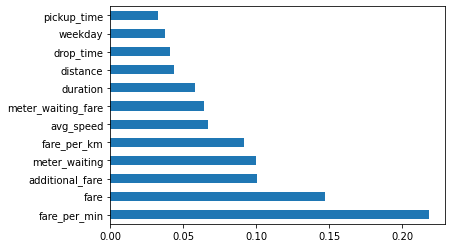

In [59]:
xgb.fit(X,y)
(pd.Series(xgb.feature_importances_, index=X.columns)
   .nlargest(15)
   .plot(kind='barh')) 

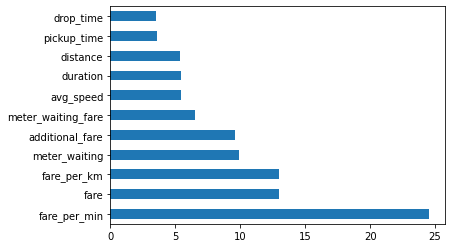

In [33]:
cat.fit(X,y,verbose=False)
(pd.Series(cat.get_feature_importance(), index=X.columns)
   .nlargest(30)
   .plot(kind='barh'))

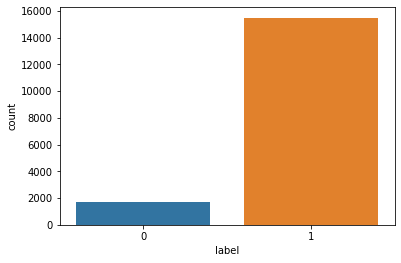

In [41]:
sns.countplot(y)

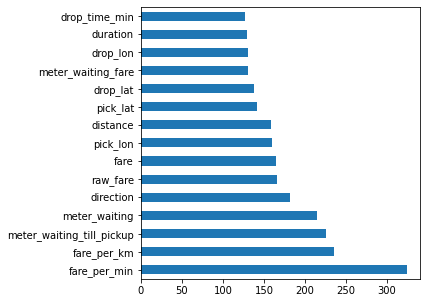

In [8]:
lgb.fit(X,y)
(pd.Series(lgb.feature_importances_, index=X.columns)
   .nlargest(15)
   .plot(kind='barh',figsize=(5,5))) 

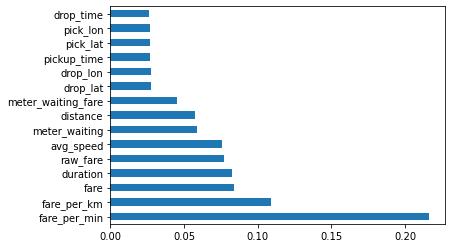

In [70]:
rf.fit(X,y)
(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [71]:
X.columns

Index(['duration', 'meter_waiting', 'meter_waiting_fare', 'fare', 'distance',
       'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'additional_fare',
       'pickup_time', 'drop_time', 'weekday', 'avg_speed', 'raw_fare',
       'fare_per_km', 'fare_per_min'],
      dtype='object')

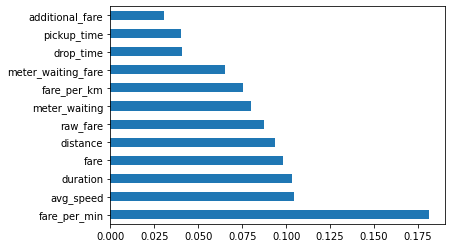

In [105]:
ext.fit(X,y)
(pd.Series(ext.feature_importances_, index=X.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [89]:
AvgF1(10,vclf3)

0.9742265303031985

In [80]:
cat.fit(X,y)
predict = cat.predict(test)
submission_df = pd.DataFrame(predict,index=test.index,columns=["prediction"])

Learning rate set to 0.034692
0:	learn: 0.6482067	total: 13.4ms	remaining: 13.4s
1:	learn: 0.6111923	total: 20.2ms	remaining: 10.1s
2:	learn: 0.5765208	total: 32.3ms	remaining: 10.7s
3:	learn: 0.5395009	total: 39.2ms	remaining: 9.76s
4:	learn: 0.5071472	total: 45.8ms	remaining: 9.12s
5:	learn: 0.4780372	total: 52.4ms	remaining: 8.68s
6:	learn: 0.4506527	total: 59.2ms	remaining: 8.4s
7:	learn: 0.4264807	total: 65.9ms	remaining: 8.17s
8:	learn: 0.4037200	total: 72.6ms	remaining: 7.99s
9:	learn: 0.3846083	total: 79.4ms	remaining: 7.86s
10:	learn: 0.3668697	total: 86ms	remaining: 7.73s
11:	learn: 0.3507080	total: 92.8ms	remaining: 7.64s
12:	learn: 0.3375213	total: 99.5ms	remaining: 7.56s
13:	learn: 0.3236930	total: 106ms	remaining: 7.49s
14:	learn: 0.3119389	total: 113ms	remaining: 7.42s
15:	learn: 0.3012014	total: 120ms	remaining: 7.36s
16:	learn: 0.2912343	total: 126ms	remaining: 7.31s
17:	learn: 0.2818614	total: 133ms	remaining: 7.26s
18:	learn: 0.2730390	total: 140ms	remaining: 7.22s
1

183:	learn: 0.1302199	total: 1.44s	remaining: 6.37s
184:	learn: 0.1301314	total: 1.44s	remaining: 6.37s
185:	learn: 0.1299776	total: 1.46s	remaining: 6.37s
186:	learn: 0.1298577	total: 1.47s	remaining: 6.38s
187:	learn: 0.1296954	total: 1.47s	remaining: 6.37s
188:	learn: 0.1295282	total: 1.48s	remaining: 6.36s
189:	learn: 0.1293713	total: 1.49s	remaining: 6.35s
190:	learn: 0.1292610	total: 1.5s	remaining: 6.33s
191:	learn: 0.1291477	total: 1.5s	remaining: 6.32s
192:	learn: 0.1289842	total: 1.51s	remaining: 6.31s
193:	learn: 0.1288701	total: 1.52s	remaining: 6.3s
194:	learn: 0.1287181	total: 1.52s	remaining: 6.29s
195:	learn: 0.1285082	total: 1.53s	remaining: 6.28s
196:	learn: 0.1284142	total: 1.54s	remaining: 6.27s
197:	learn: 0.1283175	total: 1.54s	remaining: 6.25s
198:	learn: 0.1281646	total: 1.55s	remaining: 6.24s
199:	learn: 0.1280905	total: 1.56s	remaining: 6.23s
200:	learn: 0.1280333	total: 1.56s	remaining: 6.22s
201:	learn: 0.1278557	total: 1.57s	remaining: 6.21s
202:	learn: 0.1

364:	learn: 0.1121725	total: 2.85s	remaining: 4.95s
365:	learn: 0.1121155	total: 2.85s	remaining: 4.95s
366:	learn: 0.1120423	total: 2.87s	remaining: 4.94s
367:	learn: 0.1119709	total: 2.88s	remaining: 4.94s
368:	learn: 0.1118787	total: 2.88s	remaining: 4.93s
369:	learn: 0.1117919	total: 2.89s	remaining: 4.92s
370:	learn: 0.1117400	total: 2.9s	remaining: 4.92s
371:	learn: 0.1116582	total: 2.91s	remaining: 4.91s
372:	learn: 0.1115886	total: 2.91s	remaining: 4.9s
373:	learn: 0.1115044	total: 2.92s	remaining: 4.89s
374:	learn: 0.1114187	total: 2.93s	remaining: 4.88s
375:	learn: 0.1113227	total: 2.93s	remaining: 4.87s
376:	learn: 0.1112721	total: 2.94s	remaining: 4.86s
377:	learn: 0.1112382	total: 2.95s	remaining: 4.85s
378:	learn: 0.1111733	total: 2.95s	remaining: 4.84s
379:	learn: 0.1110672	total: 2.96s	remaining: 4.83s
380:	learn: 0.1109657	total: 2.97s	remaining: 4.82s
381:	learn: 0.1108571	total: 2.98s	remaining: 4.81s
382:	learn: 0.1107806	total: 2.98s	remaining: 4.8s
383:	learn: 0.1

524:	learn: 0.1014794	total: 4.07s	remaining: 3.68s
525:	learn: 0.1014580	total: 4.07s	remaining: 3.67s
526:	learn: 0.1014167	total: 4.09s	remaining: 3.67s
527:	learn: 0.1013441	total: 4.09s	remaining: 3.66s
528:	learn: 0.1012975	total: 4.1s	remaining: 3.65s
529:	learn: 0.1012531	total: 4.11s	remaining: 3.64s
530:	learn: 0.1011785	total: 4.12s	remaining: 3.63s
531:	learn: 0.1011022	total: 4.12s	remaining: 3.63s
532:	learn: 0.1010448	total: 4.13s	remaining: 3.62s
533:	learn: 0.1009919	total: 4.13s	remaining: 3.61s
534:	learn: 0.1009262	total: 4.14s	remaining: 3.6s
535:	learn: 0.1008737	total: 4.15s	remaining: 3.59s
536:	learn: 0.1008149	total: 4.16s	remaining: 3.58s
537:	learn: 0.1007773	total: 4.16s	remaining: 3.57s
538:	learn: 0.1007252	total: 4.17s	remaining: 3.56s
539:	learn: 0.1006789	total: 4.17s	remaining: 3.56s
540:	learn: 0.1006471	total: 4.18s	remaining: 3.55s
541:	learn: 0.1005624	total: 4.19s	remaining: 3.54s
542:	learn: 0.1004723	total: 4.2s	remaining: 3.53s
543:	learn: 0.1

698:	learn: 0.0924522	total: 5.5s	remaining: 2.37s
699:	learn: 0.0924204	total: 5.51s	remaining: 2.36s
700:	learn: 0.0923828	total: 5.53s	remaining: 2.36s
701:	learn: 0.0923273	total: 5.53s	remaining: 2.35s
702:	learn: 0.0922934	total: 5.54s	remaining: 2.34s
703:	learn: 0.0922279	total: 5.55s	remaining: 2.33s
704:	learn: 0.0921776	total: 5.56s	remaining: 2.33s
705:	learn: 0.0921438	total: 5.57s	remaining: 2.32s
706:	learn: 0.0921274	total: 5.57s	remaining: 2.31s
707:	learn: 0.0920803	total: 5.58s	remaining: 2.3s
708:	learn: 0.0920491	total: 5.58s	remaining: 2.29s
709:	learn: 0.0920083	total: 5.59s	remaining: 2.28s
710:	learn: 0.0919761	total: 5.6s	remaining: 2.27s
711:	learn: 0.0919061	total: 5.61s	remaining: 2.27s
712:	learn: 0.0918339	total: 5.61s	remaining: 2.26s
713:	learn: 0.0917587	total: 5.62s	remaining: 2.25s
714:	learn: 0.0917180	total: 5.63s	remaining: 2.24s
715:	learn: 0.0916802	total: 5.63s	remaining: 2.23s
716:	learn: 0.0916614	total: 5.64s	remaining: 2.23s
717:	learn: 0.0

861:	learn: 0.0854115	total: 6.72s	remaining: 1.07s
862:	learn: 0.0853848	total: 6.73s	remaining: 1.07s
863:	learn: 0.0853163	total: 6.74s	remaining: 1.06s
864:	learn: 0.0852755	total: 6.75s	remaining: 1.05s
865:	learn: 0.0852415	total: 6.76s	remaining: 1.05s
866:	learn: 0.0852064	total: 6.77s	remaining: 1.04s
867:	learn: 0.0851740	total: 6.78s	remaining: 1.03s
868:	learn: 0.0851310	total: 6.79s	remaining: 1.02s
869:	learn: 0.0850895	total: 6.8s	remaining: 1.02s
870:	learn: 0.0850030	total: 6.81s	remaining: 1.01s
871:	learn: 0.0849679	total: 6.82s	remaining: 1s
872:	learn: 0.0849236	total: 6.82s	remaining: 993ms
873:	learn: 0.0848971	total: 6.83s	remaining: 985ms
874:	learn: 0.0848565	total: 6.84s	remaining: 977ms
875:	learn: 0.0847960	total: 6.84s	remaining: 969ms
876:	learn: 0.0847405	total: 6.85s	remaining: 961ms
877:	learn: 0.0847214	total: 6.86s	remaining: 953ms
878:	learn: 0.0847068	total: 6.86s	remaining: 945ms
879:	learn: 0.0846682	total: 6.87s	remaining: 937ms
880:	learn: 0.08

In [81]:
submission_df.to_csv("cat_feng_with_rawfare.csv")

In [82]:
submission_df.head(50)

,prediction
tripid,
213284604,1
213286352,0
213293973,1
213294622,1
213298687,1
213299545,0
213302332,1
213302671,1
213305594,1
